# Computations for solving micro-wire permeability

The expression for calculate the wire permeability is shown below:


$$\tilde{\mu}=1+4\pi\tilde{\chi}$$



Donde, 

$$\tilde{\chi}=\frac{\omega_M(\omega_2-i\tau\omega)+4\pi\omega^2_M}{(\omega_1-i\tau\omega)(\omega_2+4\pi\omega_M-i\tau\omega)-\omega^2}$$

Con, 

$$\chi_1=\omega_M(\omega_1-i\tau\omega)/\Delta$$
$$\chi_2=\omega_M(\omega_2-i\tau\omega)/\Delta$$ $$\chi_a=\omega\omega_M/\Delta$$ $$\Delta=(\omega_2-i\tau\omega)(\omega_1-i\tau\omega)-\omega^2$$ $$\omega_1=\gamma[H_{ex}cos(\theta)+H_kcos2(\psi-\theta)]$$
$$H_k=2K/M_0$$
$$\omega_2=\gamma[H_{ex}cos(\theta)+H_kcos^2(\psi-\theta)]$$ $$\omega_M=\gamma M_0$$

Reference:

**Field dependent permittivity of composite materials containing ferromagnetic wires**

(http://dx.doi.org/10.1063/1.1557780)

(-2.9213666500610063+0.5894922001248688j)

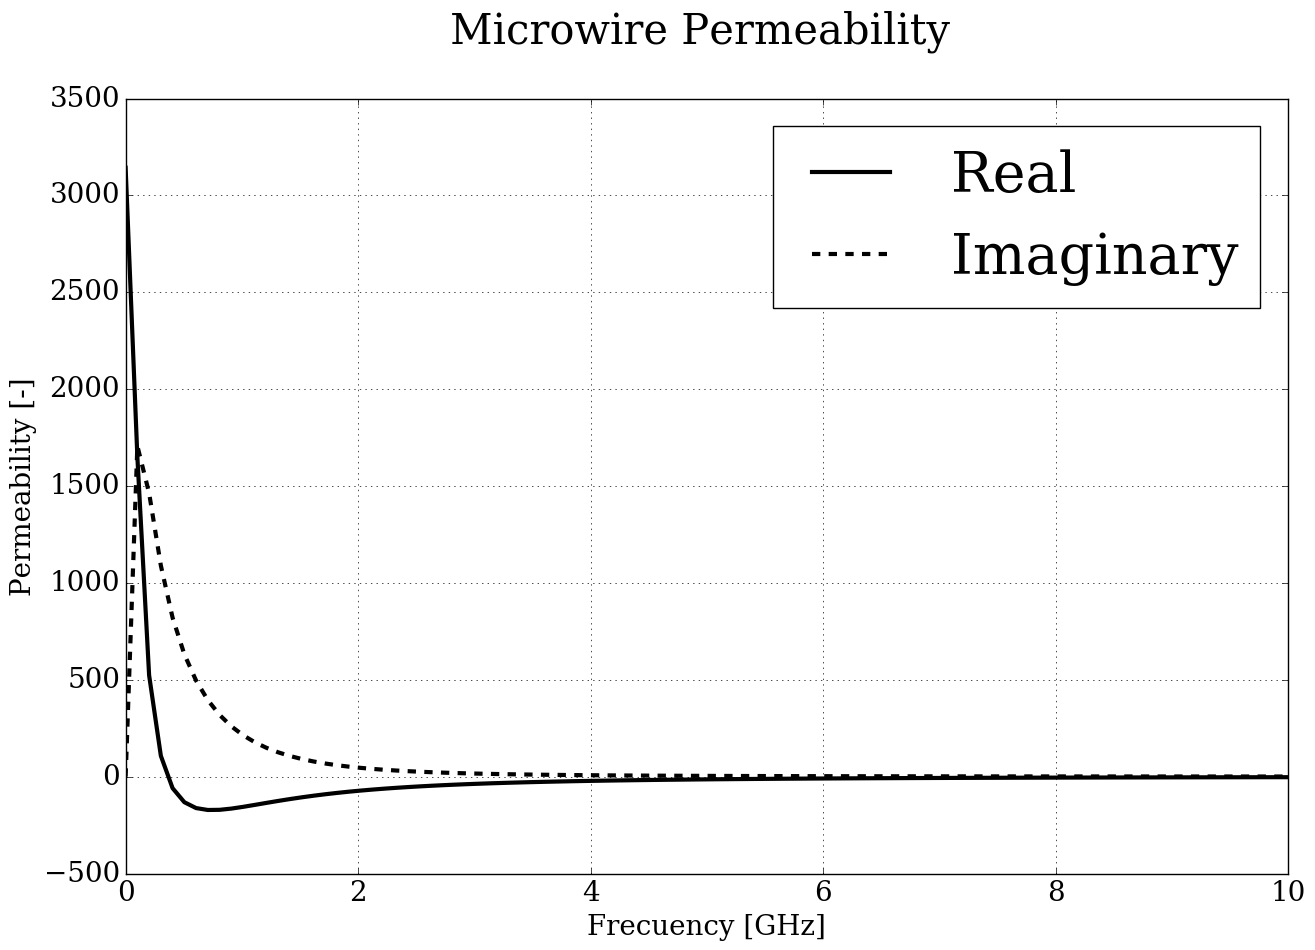

In [3]:
#### SOLVER PERMEABILIDAD HILO ####
from matplotlib import pyplot as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpmath import *
from sympy import *
from scipy import special as sp
from matplotlib import rcParams

####PLOTEAR EN EL NOTEBOOK####
%matplotlib inline

#### EXPRESIONES Y VALORES ####
f=np.linspace(10,10e9,100) 
w = np.array(f)*np.pi*2 #frecuencia angular
gamma = 2e7 #[rad/s/Oe] Giromagnetic constant
Hex = 0. #No external field
Hk = 2. #[Oe] Anisotropy field
psi = np.pi/2. #90°
theta = np.pi/2. #gráfico
w1 = gamma*(Hex*np.cos(theta)+Hk*np.cos(2*(psi-theta)))
w2 = gamma*(Hex*np.cos(theta)+Hk*(np.cos(psi-theta))**2)
M0 = 500. #[G] saturation magnetization
wm = gamma*M0
tau = 0.06 #sacado al ojo
n=len(w)
#dummy=np.linspace(1,1e9,n)
valores=[]
for i in range(n):
    valores = np.append(valores,(wm*(w2-1j*tau*w[i])+4*np.pi*(wm**2))/((w1-1j*tau*w[i])*(w2+4*np.pi*wm-1j*tau*w[i])-(w[i]**2)))

mu=1+4*np.pi*valores


rcParams['font.family'] = 'serif'
rcParams['font.size'] = 20

pl.figure(figsize=(15,10))
#pl.xticks(dummy[::100], omega[::100] , rotation=75)
pl.title('Microwire Permeability \n', fontsize=30)
pl.plot(f/1e9,np.real(mu),'k-', linewidth=3,label='Real')
pl.plot(f/1e9,np.imag(mu),'k--', linewidth=3,label='Imaginary')
pl.legend(loc='best', fontsize=40)
pl.xlabel('Frecuency [GHz]', fontsize=20)
pl.ylabel('Permeability [-]', fontsize=20)
pl.grid();

mu[99]